# pandas Tutorial

## Introduction

pandas is a Python library used for data analysis. pandas integrates well with numpy, matplotlib, and Jupyter notebooks. In some sense, pandas is similar to numpy, but pandas is much more geared toward data analysis while numpy is geared toward mathematical operations.

We begin by importing the relevant modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Loading in data

pandas allows you to work with data using what's called a DataFrame, which is a grid of data. The rows of the grid correspond to each data entry and the columns of the grid, called Series, correspond to a specific type of data. A DataFrame can, in some sense, be thought of as an Excel spreadsheet filled with data.

One way to load data is through numpy arrays.

In [3]:
np_data = np.array([[    '', 'Col1', 'Col2'],
                    ['Row1',      1,     2],
                    ['Row2',      3,     4]])
pd.DataFrame(data=np_data[1:,1:], index=np_data[1:,0], columns=np_data[0,1:])

,Col1,Col2
Row1,1,2
Row2,3,4


pandas can also work with timestamps. We'll create use pandas to create a range of dates and then numpy to create some random data. We'll use the dates as the first series and the random data as the next four series.

In [4]:
dates = pd.date_range('20180101', periods=6)
np_data = np.random.randn(6, 4)

In [5]:
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
np_data

array([[-0.13432983, -1.86697794,  1.08399005, -0.96044401],
       [ 1.42996944,  0.04464219, -0.97735293,  1.18167031],
       [-2.10525045,  0.47846596,  0.08161497,  0.45512167],
       [ 1.3060748 , -0.23422331, -0.9022194 ,  0.70541381],
       [ 0.28655008, -1.18384601, -0.86415828,  1.41419018],
       [-0.23025546, -1.20583164,  0.47957073,  0.30154855]])

In [7]:
pd.DataFrame(np_data, index=dates, columns=list('ABCD'))

,A,B,C,D
2018-01-01,-0.134330,-1.866978,1.083990,-0.960444
2018-01-02,1.429969,0.044642,-0.977353,1.181670
2018-01-03,-2.105250,0.478466,0.081615,0.455122
2018-01-04,1.306075,-0.234223,-0.902219,0.705414
2018-01-05,0.286550,-1.183846,-0.864158,1.414190
2018-01-06,-0.230255,-1.205832,0.479571,0.301549


Generally, you will be loading data from some data source. We'll load a csv file containing game review data from IGN. The `head` method just shows the top 5 rows. Since this data set is much larger, we only want to see a snippet of it.

In [8]:
reviews = pd.read_csv('ign.csv')
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Similar to numpy, we can see the size of our data using the `shape` method.

In [9]:
reviews.shape

(18625, 11)

## Indexing

As mentioned previously, pandas is similar to numpy in some respects. One of those is accessing sections of our DataFrame, which is very similar to accessing sub-arrays using numpy.

We can emulate the behavior of the `head` method by using the `iloc` method, which works the same way as numpy slicing.

In [10]:
reviews.iloc[0:5,:]  # access the first 5 rows

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [11]:
reviews.iloc[0:5,5]  # access the score column of the first 5 rows

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
Name: score, dtype: float64

Since the first series in the dataset is a duplicate of our index, let's remove it.

In [12]:
reviews = reviews.iloc[:,1:]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


While this sort of indexing works well for matrices, one thing that sets pandas apart from numpy is that row and series labels can be used for addressing. To use labels, use the `loc` method instead of `iloc`.

In [13]:
reviews.loc[0:5,'score']  # similar to the previous example, but indexing by name

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
Name: score, dtype: float64

We can see all the available columns by accessing the `columns` attribute.

In [14]:
reviews.columns

Index(['score_phrase', 'title', 'url', 'platform', 'score', 'genre',
       'editors_choice', 'release_year', 'release_month', 'release_day'],
      dtype='object')

We can also access multiple columns by passing in a list to `loc`. The order of the output will be the same as the order we request.

In [15]:
reviews.loc[5:10, ['score', 'title']]  # access the score and title from the second set of 5 rows

,score,title
5,7.0,Total War Battles: Shogun
6,3.0,Double Dragon: Neon
7,9.0,Guild Wars 2
8,3.0,Double Dragon: Neon
9,7.0,Total War Battles: Shogun
10,7.5,Tekken Tag Tournament 2


Finally, we can access an entire series (or multiple) by directly indexing our DataFrame.

In [16]:
reviews['score'].head()

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
Name: score, dtype: float64

## Computation on DataFrames

pandas can be used for more than just data manipulation. For example, it provides methods such as `mean`, `median`, `std`, and several others to perform calculations on the data set.

We can take the mean of scores like so.

In [17]:
reviews['score'].mean()

6.950459060402666

We can also take the mean of all of the numerical series if we don't only select the score series.

In [18]:
reviews.mean()

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

Another useful tool is to see if series are correlated to one another. pandas provides the `corr` method to do that.

In [19]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


Since the values are all far from 1 (except for the diagonal), we can conclude that the series are not correlated. This may be useful, for example, in determining if games have been getting better over the years (i.e. `release_year` and `score` have some sort of correlation).

## Filtering

pandas makes filtering easy. All you need to do is specify the predicate and pandas will apply it to the DataFrame or Series!

In [20]:
score_filter = reviews['score'] > 7
score_filter.head(10)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8    False
9    False
Name: score, dtype: bool

A predicate can then be used to index into the DataFrame.

In [21]:
filtered_reviews = reviews[score_filter]

In [22]:
filtered_reviews.head(10)

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


We can also combine filters just as easily.

In [23]:
xbox_one_filter = (reviews['score'] > 7) & (reviews['platform'] == 'Xbox One')
filtered_reviews = reviews[xbox_one_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18


## Plotting

Plotting is extremely easy with pandas!

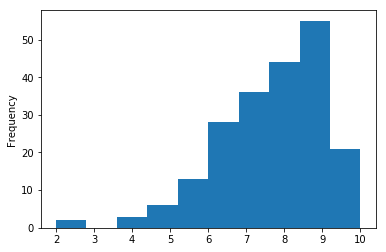

In [24]:
xbox_one_filter = reviews['platform'] == 'Xbox One'
reviews[xbox_one_filter]['score'].plot(kind='hist');

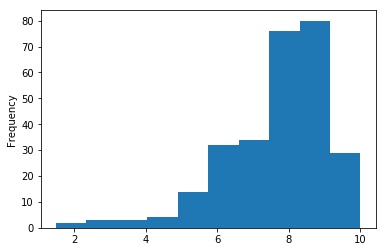

In [25]:
ps4_filter = reviews['platform'] == 'PlayStation 4'
reviews[ps4_filter]['score'].plot(kind='hist');

Looks like based on IGN reviews, the PS4 has a much higher quality to content ratio than the Xbox One!

## References

* [10-minute tutorial](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Karlijn Willems' tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
* [Dataquest tutorial](https://www.dataquest.io/blog/pandas-python-tutorial/)